In [2]:
import caffe

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os,sys

caffe_root='/Users/elbert/dev/git/caffe/'

%matplotlib inline

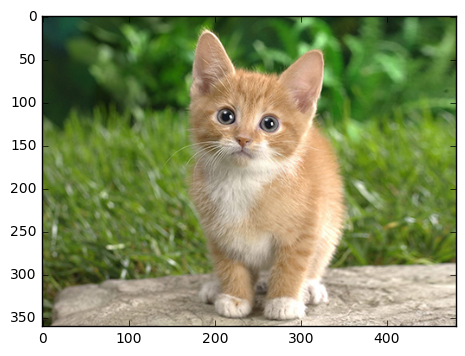

In [86]:
im = caffe.io.load_image(caffe_root + 'examples/images/cat.jpg')
plt.imshow(im)

In [27]:
im_input=im[np.newaxis,:,:,:].transpose(0,3,1,2)
im_input.shape

(1, 3, 360, 480)

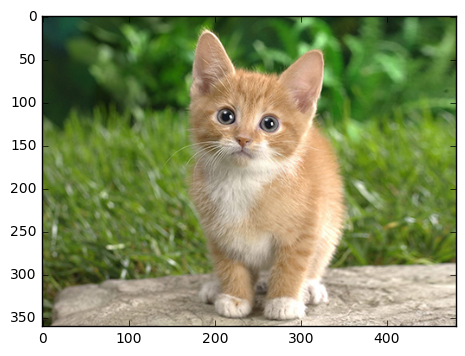

In [26]:
net = caffe.Net('/Users/elbert/dev/git/caffe/examples/mytrain/1/conv.prototxt', caffe.TEST)
# 星号是C++里指针的作用
net.blobs['data'].reshape(*im_input.shape)
net.blobs['data'].data[...] = im_input
plt.imshow(net.blobs['data'].data[0].transpose(1,2,0))

In [43]:
# 只取灰色通道的数据
plt.rcParams['image.cmap'] = 'gray'

In [62]:
def show_data(data,head,padsize=1, padval=0):
    data -= data.min()
    data /= data.max()
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    print data.shape[0], n
    padding = ((0, n ** 2 - data.shape[0]), (0, padsize), (0, padsize)) + ((0, 0),) * (data.ndim - 3)
    data = np.pad(data, padding, mode='constant', constant_values=(padval, padval))
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    plt.figure()
    plt.title(head)
    plt.imshow(data)
    plt.axis('off')

data-blobs: (1, 3, 360, 480)
3 2


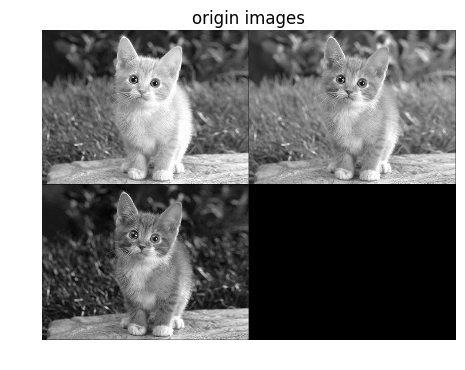

In [63]:
print "data-blobs:",net.blobs['data'].data.shape
show_data(net.blobs['data'].data[0],'origin images')

调用forward()执行卷积操作，blobs数据发生改变。由原来的(1,3,360,480)变为（1，16，356，476）。

并初始化生成了相应的权值，权值数据为(16,3,5,5)。

最后调用两次show_data来分别显示权值和卷积过滤后的16通道图片。

In [ ]:
net.forward()

data-blobs: (1, 3, 360, 480)
conv-blobs: (1, 9, 356, 476)
weight-blobs: (9, 3, 5, 5)
9 3
9 3


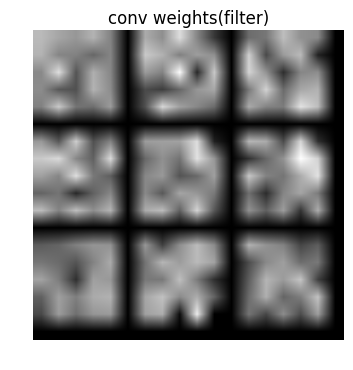

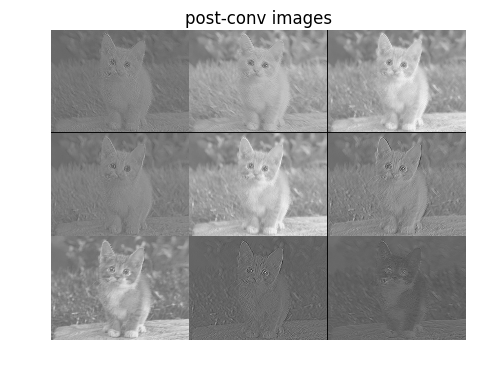

In [64]:
print "data-blobs:",net.blobs['data'].data.shape
print "conv-blobs:",net.blobs['conv'].data.shape
print "weight-blobs:",net.params['conv'][0].data.shape
show_data(net.params['conv'][0].data[:,0],'conv weights(filter)')
show_data(net.blobs['conv'].data[0],'post-conv images')

(360, 480, 3)

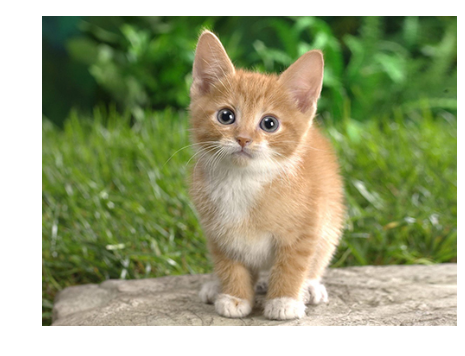

In [87]:
rows,cols,dims=im.shape
for i in range(1):
    x=np.random.randint(0,rows)
    y=np.random.randint(0,cols)
    im[x,y,:]=0
plt.figure('Cat')
plt.imshow(im)
plt.axis('off')
im.shape